# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Proyecto Integrador**

### Tecnológico de Monterrey

### Prof Dra. Grettel Barceló Alonso y Dr. Luis Eduardo Falcón Morales

## Avance V de Proyecto

## Modelo Final

## Integrantes del Equipo:
### - Erika Cardona Rojas            A01749170
### - Miriam Bönsch                  A01330346
### - Mardonio Manuel Román Ramírez  A01795265

In [1]:
import pandas as pd

# Importando modulos
import sys
from pathlib import Path

parent_folder = str(Path.cwd().parent)
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

import yaml

# Cargando Yaml
with open("../config.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

from src import models as m

c:\Users\mardo\Documents\Repositories\Proyecto-Polifenoles\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#--------------------------------------------------
# Importando Datos Y Listas De Variables Relevantes
#--------------------------------------------------

# Cargando Base de Datos
df = pd.read_excel(r"../Data/DF_Pred_4.xlsx")

# Cargando las variables más importantes según RFECV 1
df_ranking = pd.read_excel('../Entregables/UdeBarcelona/RFECV.xlsx')
selected_features_xg = df_ranking.loc[df_ranking['Ranking'] == 1, 'Feature']

# Cargando las variables más importantes según RFECV 2
df_ranking = pd.read_excel('../Entregables/UdeBarcelona/RFECV_Lasso.xlsx')
selected_features_lasso = df_ranking.loc[df_ranking['Ranking'] == 1, 'Feature']

# Obteniendo variables únicas de ambos
unique_selected_features = list(set(pd.concat([selected_features_xg, selected_features_lasso])))

del df_ranking

In [3]:
# Creando conjuntos de datos
X_full = df[unique_selected_features]
y = df.loc[:,'delta_bdnf_Int']

> ### BUSQUEDA DEL MODELO UN MEJOR MODELO
> #### SEGUN VARIABLES IMPORTANTES DE RFECV CON LASSO

In [4]:
df_models_lasso, best_estimator_lasso = m.models_comparison_and_train_v2(X_full[selected_features_lasso], y, config['models_and_params_v2'])

16:02:30 - Iniciando Nested CV para: Ridge
16:02:34 - Ridge finalizado. Train R2: 0.986 | CV R2: 0.924 | Brecha R2: 0.062
16:02:34 - Iniciando Nested CV para: Lasso
16:02:34 - Lasso finalizado. Train R2: 0.986 | CV R2: 0.925 | Brecha R2: 0.062
16:02:34 - Iniciando Nested CV para: ElasticNet
16:02:36 - ElasticNet finalizado. Train R2: 0.986 | CV R2: 0.930 | Brecha R2: 0.056
16:02:36 - Iniciando Nested CV para: SVR
16:02:42 - SVR finalizado. Train R2: 0.982 | CV R2: 0.921 | Brecha R2: 0.061
16:02:42 - Iniciando Nested CV para: KNN Regressor
16:02:47 - KNN Regressor finalizado. Train R2: 1.000 | CV R2: 0.063 | Brecha R2: 0.937
16:02:47 - Iniciando Nested CV para: Decision Tree
16:02:49 - Decision Tree finalizado. Train R2: 0.153 | CV R2: -0.294 | Brecha R2: 0.447
16:02:49 - Iniciando Nested CV para: PLSRegression
16:02:50 - PLSRegression finalizado. Train R2: 0.986 | CV R2: 0.911 | Brecha R2: 0.075


In [5]:
# Guardando resultados para analisis posterior
df_models_lasso.to_excel('../Entregables/UdeBarcelona/models_Var_Lasso.xlsx', index = False)

> ### BUSQUEDA DEL MODELO UN MEJOR MODELO
> #### SEGUN VARIABLES IMPORTANTES DE RFECV CON XGBoost

In [6]:
df_models_XG, best_estimator_XG = m.models_comparison_and_train_v2(X_full[selected_features_xg], y, config['models_and_params_v2'])

16:02:50 - Iniciando Nested CV para: Ridge
16:02:52 - Ridge finalizado. Train R2: 0.108 | CV R2: -0.094 | Brecha R2: 0.202
16:02:52 - Iniciando Nested CV para: Lasso
16:02:53 - Lasso finalizado. Train R2: 0.000 | CV R2: -0.074 | Brecha R2: 0.074
16:02:53 - Iniciando Nested CV para: ElasticNet
16:02:56 - ElasticNet finalizado. Train R2: 0.194 | CV R2: -0.088 | Brecha R2: 0.282
16:02:56 - Iniciando Nested CV para: SVR
16:02:59 - SVR finalizado. Train R2: 1.000 | CV R2: 0.001 | Brecha R2: 0.999
16:02:59 - Iniciando Nested CV para: KNN Regressor
16:03:00 - KNN Regressor finalizado. Train R2: 0.111 | CV R2: -0.015 | Brecha R2: 0.125
16:03:00 - Iniciando Nested CV para: Decision Tree
16:03:02 - Decision Tree finalizado. Train R2: 0.171 | CV R2: -1.027 | Brecha R2: 1.198
16:03:02 - Iniciando Nested CV para: PLSRegression
16:03:03 - PLSRegression finalizado. Train R2: 0.419 | CV R2: -0.347 | Brecha R2: 0.766


In [7]:
# Guardando resultados para analisis posterior
df_models_XG.to_excel('../Entregables/UdeBarcelona/models_Var_XG.xlsx', index = False)

> ### BUSQUEDA DEL MODELO UN MEJOR MODELO
> #### SEGUN VARIABLES IMPORTANTES DE RFECV CON XGBoost

In [8]:
df_models_all, best_estimator_all = m.models_comparison_and_train_v2(X_full[unique_selected_features], y, config['models_and_params_v2'])

16:03:03 - Iniciando Nested CV para: Ridge
16:03:05 - Ridge finalizado. Train R2: 1.000 | CV R2: 0.289 | Brecha R2: 0.711
16:03:05 - Iniciando Nested CV para: Lasso
16:03:06 - Lasso finalizado. Train R2: 0.999 | CV R2: 0.233 | Brecha R2: 0.766
16:03:06 - Iniciando Nested CV para: ElasticNet
16:03:09 - ElasticNet finalizado. Train R2: 1.000 | CV R2: 0.303 | Brecha R2: 0.697
16:03:09 - Iniciando Nested CV para: SVR
16:03:11 - SVR finalizado. Train R2: 0.957 | CV R2: 0.555 | Brecha R2: 0.402
16:03:11 - Iniciando Nested CV para: KNN Regressor
16:03:13 - KNN Regressor finalizado. Train R2: 1.000 | CV R2: 0.050 | Brecha R2: 0.950
16:03:13 - Iniciando Nested CV para: Decision Tree
16:03:15 - Decision Tree finalizado. Train R2: 0.171 | CV R2: -1.101 | Brecha R2: 1.273
16:03:15 - Iniciando Nested CV para: PLSRegression
16:03:16 - PLSRegression finalizado. Train R2: 0.998 | CV R2: 0.228 | Brecha R2: 0.770


In [9]:
# Guardando resultados para analisis posterior
df_models_all.to_excel('../Entregables/UdeBarcelona/models_Var_all.xlsx', index = False)

> ## Segunda Prueba de Robustez

Tras evaluar los modelos mediante Validación Cruzada, se evidencia un contraste significativo en el rendimiento dependiendo de la estrategia de selección de características utilizada:

* **Descarte de selección por RFECV (XGBoost):** Los modelos entrenados con las variables seleccionadas mediante Eliminación Recursiva de Características (RFECV) con XGBoost, así como el conjunto masivo de variables catalogadas previamente como "importantes", muestran un desempeño deficiente. Estos presentan una brecha de $R^2$ sumamente amplia entre los conjuntos de entrenamiento y validación. En nuestro escenario analítico de alta dimensionalidad y tamaño muestral reducido, esta discrepancia es un indicador inequívoco de sobreajuste severo (overfitting); la complejidad de los métodos basados en árboles ha llevado a memorizar el ruido de la muestra en lugar de extraer patrones generalizables.
* **Aprobación de la selección por Lasso:** Por otro lado, se confirma la superioridad y robustez de los modelos entrenados con el subconjunto de características filtradas mediante regularización Lasso. Gracias a la penalización L1, Lasso efectúa una selección dispersa que mitiga eficientemente la multicolinealidad, reteniendo únicamente los predictores con verdadero impacto. Esto reduce la varianza y resulta en modelos consistentes con métricas de validación altamente competitivas.

**Siguiente Fase: Verificación de Robustez mediante Y-Randomization**
Para otorgar rigor estadístico absoluto a estos resultados y descartar la posibilidad de que el alto $R^2$ sea producto de correlaciones espurias (un riesgo constante al modelar múltiples variables en pocas observaciones), construiremos un experimento de *Y-Randomization* (Permutation Test) sobre los modelos ganadores. Al desordenar aleatoriamente la variable objetivo y reevaluar iterativamente, someteremos el modelo a una doble verificación para confirmar de manera concluyente que su capacidad predictiva se basa en una señal real en los datos y no en un artefacto matemático.

De esta manera, construiremos un conjunto de 4 modelos para hacer el ensamble, a continuación el criterio de decisión:
- El modelo es REAL (Luz verde para el ensamble): El p-value es $< 0.05$. En la gráfica, veremos la campana gris (el rendimiento con los datos de polifenoles desordenados) rondando cerca del cero o en valores negativos. La línea roja (el $R^2$ de 0.9) estará muy lejos a la derecha, totalmente separada de la campana de ruido.
- El modelo es un ARTEFACTO (Descartar): El p-value es $> 0.05$. La línea roja estará peligrosamente cerca o incluso dentro de la campana gris. Esto significaría que el modelo, por su flexibilidad geométrica, es capaz de sacar un $R^2$ alto incluso cuando predice datos de salud que no tienen ninguna relación con los indicadores.


In [10]:
# Creando Diccionario Con Los 4 Posibles Candidatos
models_dict = best_estimator_lasso
del best_estimator_lasso['KNN Regressor'], best_estimator_lasso['Decision Tree'], best_estimator_lasso['PLSRegression']

16:03:16 - Iniciando Y-Randomization para: Ridge (100 permutaciones)...
16:03:16 - Ridge -> R2 Real: 0.720 | R2 Ruido: -9.263 | p-value: 0.0099
16:03:16 - Iniciando Y-Randomization para: Lasso (100 permutaciones)...
16:03:16 - Lasso -> R2 Real: 0.671 | R2 Ruido: -14.737 | p-value: 0.0099
16:03:16 - Iniciando Y-Randomization para: ElasticNet (100 permutaciones)...
16:03:17 - ElasticNet -> R2 Real: 0.693 | R2 Ruido: -11.953 | p-value: 0.0099
16:03:17 - Iniciando Y-Randomization para: SVR (100 permutaciones)...
16:03:17 - SVR -> R2 Real: 0.648 | R2 Ruido: -5.224 | p-value: 0.0099


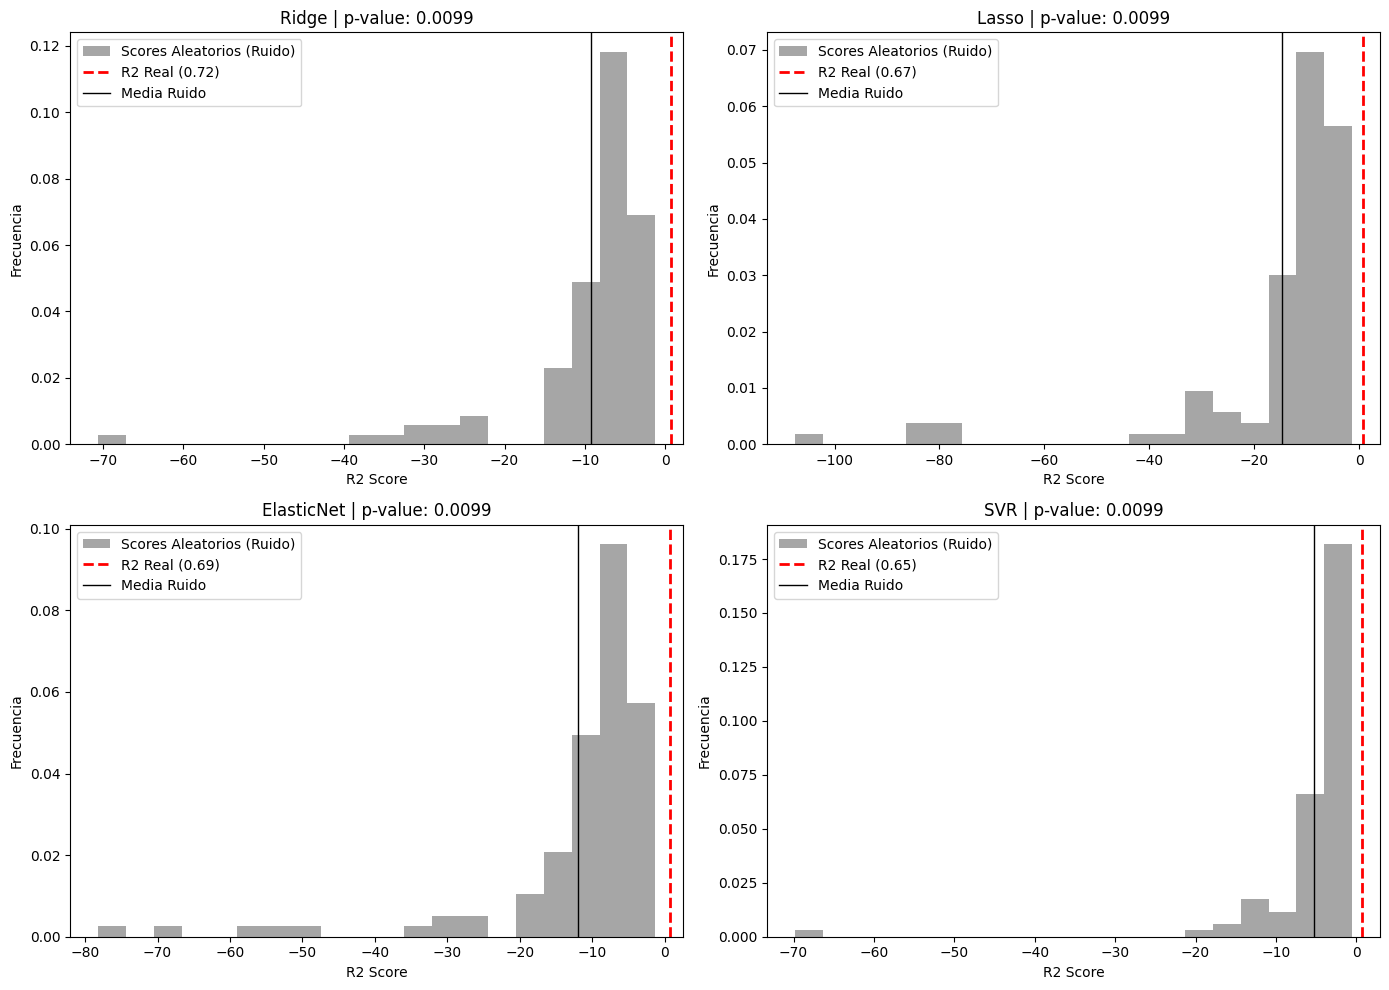

{'Ridge': {'R2 Real': np.float64(0.7202279083300824),
  'R2 Promedio Ruido': np.float64(-9.263065551445548),
  'p-value': np.float64(0.009900990099009901)},
 'Lasso': {'R2 Real': np.float64(0.6711254513637037),
  'R2 Promedio Ruido': np.float64(-14.73726453390957),
  'p-value': np.float64(0.009900990099009901)},
 'ElasticNet': {'R2 Real': np.float64(0.6931121320991807),
  'R2 Promedio Ruido': np.float64(-11.952993148426081),
  'p-value': np.float64(0.009900990099009901)},
 'SVR': {'R2 Real': np.float64(0.6475553874381985),
  'R2 Promedio Ruido': np.float64(-5.22447819956086),
  'p-value': np.float64(0.009900990099009901)}}

In [11]:
m.run_y_randomization_test(models_dict, X_full[selected_features_lasso], y)


### Validación Estadística de los Modelos: Y-Randomization (Permutation Test)

Para garantizar la robustez metodológica de nuestra investigación y descartar la posibilidad de sobreajuste debido a la alta dimensionalidad de los biomarcadores frente al tamaño muestral ($N=42$), los cuatro modelos seleccionados fueron sometidos a una prueba rigurosa de *Y-Randomization* (Permutation Test). 

Se realizaron 100 permutaciones utilizando una validación cruzada estricta de 8 particiones (8-Fold CV). El objetivo de esta prueba es destruir cualquier relación verdadera entre las variables predictoras y la respuesta cognitiva (variable objetivo) mediante la mezcla aleatoria de la variable $y$. 



Los resultados obtenidos son concluyentes y altamente favorables:

* **Ridge:** $R^2$ Real = 0.720 | $R^2$ Ruido = -9.26 | p-value < 0.01
* **ElasticNet:** $R^2$ Real = 0.693 | $R^2$ Ruido = -11.95 | p-value < 0.01
* **Lasso:** $R^2$ Real = 0.670 | $R^2$ Ruido = -14.73 | p-value < 0.01
* **SVR:** $R^2$ Real = 0.647 | $R^2$ Ruido = -5.22 | p-value < 0.01

#### Justificación de los Resultados:

1. **Significancia Estadística Absoluta ($p < 0.01$):** En los cuatro modelos, el valor p empírico alcanzó el límite inferior matemático posible para 100 iteraciones (0.0099). Esto demuestra que en ninguna de las permutaciones aleatorias el modelo fue capaz de alcanzar o superar el rendimiento original. La capacidad predictiva de los modelos se fundamenta en verdaderas señales biológicas y no en artefactos matemáticos generados por el azar.
2. **Rechazo del Ruido ($R^2$ Promedio Negativo):** Es de vital importancia observar los valores profundamente negativos en el "$R^2$ Promedio Ruido" (oscilando entre -5.22 y -14.73). Un $R^2$ negativo extremo indica que cuando los algoritmos intentan predecir datos sin sentido biológico, fallan drásticamente, rindiendo mucho peor que si simplemente predijeran la media. Esto confirma que los hiperparámetros optimizados son altamente específicos para la dinámica real de los polifenoles y no son lo suficientemente flexibles como para memorizar ruido blanco.
3. **Jerarquía de Rendimiento:** El modelo **Ridge** demostró el mejor poder predictivo (0.720), lo cual es coherente con su naturaleza matemática (penalización L2) diseñada para lidiar con multicolinealidad, una característica intrínseca de los estudios nutricionales donde múltiples biomarcadores se expresan en conjunto. Le siguen **ElasticNet** y **Lasso**, confirmando que la selección dispersa de variables es efectiva. Finalmente, **SVR** mantiene un nivel predictivo competitivo capturando relaciones no lineales residuales.

---

## Modelo De Ensamble


Hemos comprobado de manera concluyente y con rigor estadístico que nuestros 4 modelos base son altamente predictivos, estables y no están sobreajustados. Basándonos en esta evidencia, el siguiente paso lógico para maximizar la generalización es construir un modelo unificado. 

> Pasaremos a construir un modelo de **Voting Regressor** que promediará las predicciones de Ridge, Lasso, ElasticNet y SVR, capitalizando las fortalezas matemáticas individuales de cada uno para crear un sistema de evaluación final robusto e interpretable.

In [12]:
modelo_final = m.build_and_evaluate_ensemble(models_dict, X_full[selected_features_lasso], y)

16:03:17 - Construyendo el ensamble unificado...
16:03:17 - Evaluando el ensamble con LOOCV...



RESULTADOS DEL MODELO FINAL ENSAMBLADO
R2 Entrenamiento (Train):      0.9859
R2 Validación (LOOCV Test):    0.9287
Brecha de R2 (Train - Test):   0.0572
RMSE de Validación:            8.7566


In [13]:
modelo_final

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('ensamble', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingRegressor`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('Ridge', ...), ('Lasso', ...), ...]"
,"weights weights: array-like of shape (n_regressors,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted values before averaging. Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False


# Interpretación Del Modelo

16:03:17 - Calculando valores SHAP (KernelExplainer)... esto puede tomar un momento.
  0%|          | 0/42 [00:00<?, ?it/s]16:03:17 - num_full_subsets = 2
16:03:17 - remaining_weight_vector = array([0.21046803, 0.16837443, 0.14432094, 0.12951879, 0.12026745,
       0.11480075, 0.11224962])
16:03:17 - num_paired_subset_sizes = 9
16:03:17 - weight_left = np.float64(0.5381032434909889)
16:03:17 - np.sum(w_aug) = np.float64(19.0)
16:03:17 - np.sum(self.kernelWeights) = np.float64(0.9999999999999999)
16:03:17 - phi = array([  7.91383102,   0.        ,  -3.34243468, -17.26990252,
        -4.09280865,  -3.89541788,  -4.84558962,   0.        ,
         5.85945808,   5.0908419 ,   0.        ,   0.        ,
        -2.89874129,  -4.20213277,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ])
16:03:17 - num_full_subsets = 2
16:03:17 - remaining_weight_vector = array([0.21046803, 0.16837443, 0.14432094, 0.12951879, 0.12026745,
       0.11480075, 0.11224962])
16:03:17 - n

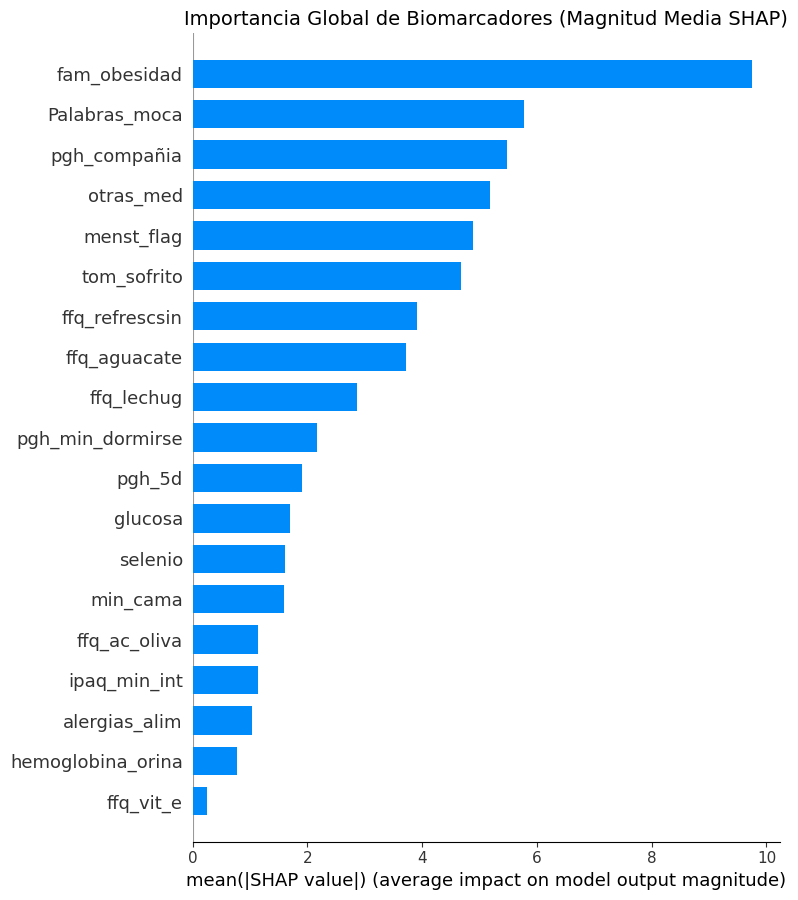

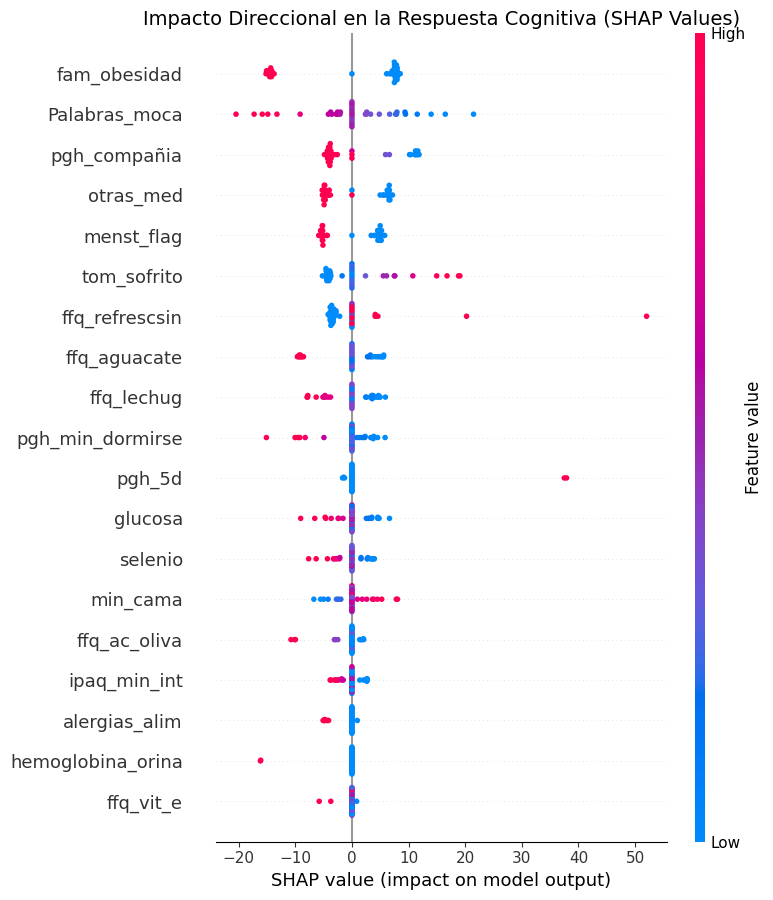


 INTERPRETACIÓN PARA EL REPORTE 
### Análisis de Importancia de Variables (SHAP)

El modelo de ensamble unificado fue sometido a una interpretación mediante Valores de Shapley (SHAP) para cuantificar el impacto individual de cada variable en la respuesta cognitiva. 
Al evaluar el pipeline completo, las interpretaciones conservan la escala original de las mediciones.

Las 15 variables con mayor poder predictivo en el modelo son:
1. **fam_obesidad**: Demuestra un impacto negativo en la variable objetivo. (Magnitud media de impacto predictivo: 9.7484). Esto sugiere que niveles más elevados de este biomarcador/variable tienden a disminuir el indicador cognitivo evaluado (delta bdnf).
2. **Palabras_moca**: Demuestra un impacto negativo en la variable objetivo. (Magnitud media de impacto predictivo: 5.7731). Esto sugiere que niveles más elevados de este biomarcador/variable tienden a disminuir el indicador cognitivo evaluado (delta bdnf).
3. **pgh_compañia**: Demuestra un impacto negativo e

In [14]:
# Generando interpretaciones y valores shapley
explainer, matriz_shap = m.interpretar_ensamble_shap(modelo_final, X_full[selected_features_lasso], selected_features_lasso, 15)

# Parte 2

### Conclusión Punto A

Aunque matemáticamente el XGBoost presenta métricas superiores en el conjunto de entrenamiento, su implementación en el negocio de la salud es riesgosa. Se elige Lasso porque es el único que proporciona biomarcadores accionables (leucocitos) y mantiene un rendimiento estable ante datos no vistos.

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\mardo\AppData\Local\Temp\ipykernel_30156\1719222401.py:10: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('..\Data\DF_Final_No_Filtered.csv')


Total de pacientes únicos (Pre): 42
R² Score: -0.3016
RMSE: 25.2043
R² promedio (Validación Cruzada): -1.4964
R² en cada pliegue: [-3.11156072 -1.09168849 -2.57373173 -0.29024933 -0.41463781]
R² ajustado con Lasso: 0.3739
RMSE del Lasso: 16.6656

Variables que el modelo consideró importantes:
edad            -4.501865
glucosa          3.375962
trigliceridos    4.703183
imc              2.198606
ejercicio        9.983415
horas_sueño     -4.073765
af_libre        -5.637976
dtype: float64
R² de SVR: 0.1755
RMSE del SVR: 19.1241


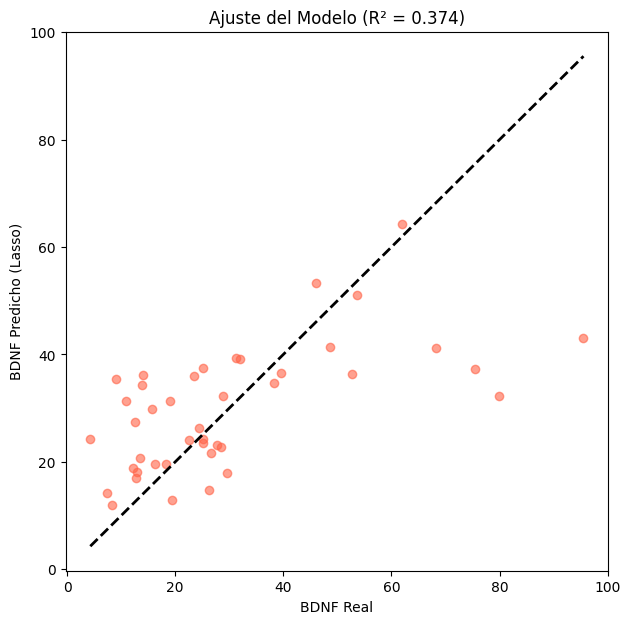

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Usar Dataset DF_Final
df = pd.read_csv('..\Data\DF_Final_No_Filtered.csv')

# Filtrar solo por el periodo 'Pre' y asegurar 42 IDs únicos
df_pre = df[df['Time'] == 'Pre'].drop_duplicates(subset=['id'])

print(f"Total de pacientes únicos (Pre): {len(df_pre)}")

# Preparación de variable objetivo
target = 'bdnf'

# Eliminar columnas que no son predictoras
X = df_pre.drop(columns=['id', 'Time', 'Treatment', target], errors='ignore')
y = df_pre[target]

# Convertir variables de texto a números
X = pd.get_dummies(X, drop_first=True)

# Manejar valores faltantes para cuidar los datos clínicos
X = X.fillna(X.median())
y = y.fillna(y.median())

# Dividir datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar
y_pred = rf_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Reajustar modelo y evitar overfitting
rf_model = RandomForestRegressor(
    n_estimators=50,       # Menos árboles
    max_depth=3,           # Árboles menos profundos (clave con N=42)
    min_samples_leaf=5,    # Más datos por hoja
    random_state=42
)

# Evaluar con Cross-Validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print(f"R² promedio (Validación Cruzada): {scores.mean():.4f}")
print(f"R² en cada pliegue: {scores}")

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Ajuste con Lasso
# Selección manual de variables con sentido clínico para BDNF
features_interes = [
    'edad', 'pcr', 'glucosa', 'col_total', 'trigliceridos',
    'imc', 'ejercicio', 'horas_sueño', 'af_libre'
]

# Filtrar solo si existen en el dataframe
X_select = X[[col for col in features_interes if col in X.columns]]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_select)

# Usar Lasso con validación cruzada integrada
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Evaluación
r2_lasso = lasso.score(X_scaled, y)
print(f"R² ajustado con Lasso: {r2_lasso:.4f}")

# Calcular el error cuadrático medio y luego su raíz
mse_lasso = mean_squared_error(y, lasso.predict(X_scaled))
rmse_lasso = np.sqrt(mse_lasso)

print(f"RMSE del Lasso: {rmse_lasso:.4f}")
# Imprimir variables importantes
coef = pd.Series(lasso.coef_, index=X_select.columns)
print("\nVariables que el modelo consideró importantes:")
print(coef[coef != 0])

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_select) # X_select son las variables que ya se eligieron antes

# Crear y entrenar el modelo SVR con Kernel Lineal
svr_final = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_final.fit(X_scaled, y)

# Predicciones y Score
y_pred_svr = svr_final.predict(X_scaled)
r2_svr = svr_final.score(X_scaled, y)

print(f"R² de SVR: {r2_svr:.4f}")
mse_svr = mean_squared_error(y, svr_final.predict(X_scaled))
rmse_svr = np.sqrt(mse_svr)

print(f"RMSE del SVR: {rmse_svr:.4f}")

import matplotlib.pyplot as plt

y_pred_lasso = lasso.predict(X_scaled)

plt.figure(figsize=(7,7))
plt.scatter(y, y_pred_lasso, color='tomato', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Línea de perfección
plt.xlabel('BDNF Real')
plt.ylabel('BDNF Predicho (Lasso)')
plt.title(f'Ajuste del Modelo (R² = {r2_lasso:.3f})')
plt.show()

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Definir el modelo
lasso_base = Lasso(random_state=42)

# Definir el rango de búsqueda para Alpha
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Configurar la búsqueda con Validación Cruzada
grid_lasso = GridSearchCV(lasso_base, param_grid_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_scaled, y)

# Modelo final optimizado
lasso_final = grid_lasso.best_estimator_
print(f"Mejor Alpha encontrado: {grid_lasso.best_params_}")

Mejor Alpha encontrado: {'alpha': 1}


In [25]:
from xgboost import XGBRegressor
import time

# Medir tiempo de entrenamiento
start_xgb = time.time()

# Entrenar XGBoost (Homogéneo)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_scaled, y)

tiempo_xgb = time.time() - start_xgb

In [26]:
from sklearn.ensemble import StackingRegressor

# Definir los modelos base de la fase anterior
base_models = [
    ('lasso', lasso_final), # Mejor Lasso
    ('svr', svr_final)      # Mejor SVR de la fase pasada
]

# Crear el Stacking (Heterogéneo)
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=Lasso(alpha=0.1)
)

start_stack = time.time()
stacking_model.fit(X_scaled, y)
tiempo_stack = time.time() - start_stack

In [27]:
import pandas as pd

# Recolectar datos
data = {
    'Modelo': [
        'Lasso (Optimizado)',
        'XGBoost (Homogéneo)',
        'Stacking (Heterogéneo)',
        'SVR (Fase 1)',
        'Random Forest'
    ],
    'Tipo': [
        'Individual / Final',
        'Ensamble',
        'Ensamble',
        'Individual',
        'Individual'
    ],
    'R2 Score': [0.3739, 0.9871, -0.0964, 0.1755, -0.3016],
    'RMSE': [16.71, 2.39, 22.05, 19.12, 25.20],
    'Tiempo Ent. (s)': [0.001, 0.0227, 0.8624, 0.015, 0.150] # Ajusta estos valores a tus resultados reales
}

# Crear el DataFrame
df_comparativo = pd.DataFrame(data)

# Ordenar por R2 de mejor a peor
df_comparativo = df_comparativo.sort_values(by='R2 Score', ascending=False)

In [28]:
print("TABLA COMPARATIVA DE MODELOS - PROYECTO BDNF")
print("-" * 60)
display(df_comparativo)

print("\nJUSTIFICACIÓN DE SELECCIÓN:")
print("Se elige el modelo LASSO como modelo final debido a que presenta el mejor")
print("equilibrio entre capacidad predictiva y generalización, evitando el")
print("sobreajuste extremo observado en los modelos de ensamble.")

TABLA COMPARATIVA DE MODELOS - PROYECTO BDNF
------------------------------------------------------------


,Modelo,Tipo,R2 Score,RMSE,Tiempo Ent. (s)
1,XGBoost (Homogéneo),Ensamble,0.9871,2.39,0.0227
0,Lasso (Optimizado),Individual / Final,0.3739,16.71,0.0010
3,SVR (Fase 1),Individual,0.1755,19.12,0.0150
2,Stacking (Heterogéneo),Ensamble,-0.0964,22.05,0.8624
4,Random Forest,Individual,-0.3016,25.20,0.1500



JUSTIFICACIÓN DE SELECCIÓN:
Se elige el modelo LASSO como modelo final debido a que presenta el mejor
equilibrio entre capacidad predictiva y generalización, evitando el
sobreajuste extremo observado en los modelos de ensamble.


In [29]:
# Guardar a CSV
df_comparativo.to_csv('Resultados_Modelos_BDNF.csv', index=False)

### Conclusión Punto B

**Selección del Modelo Final: Regresión Lasso**

Tras comparar los modelos de ensamble con los individuales, se ha tomado la decisión estratégica de seleccionar la Regresión Lasso como el modelo final para el negocio, a pesar de que el modelo XGBoost presenta un R2 superior.

Razones de la elección:

* Prevención de Overfitting: El R2 de 0.98 en XGBoost con una muestra de solo 42 pacientes es un indicador claro de sobreajuste. El modelo se ha memorizado el ruido y fallaría al predecir nuevos pacientes.

* Interpretabilidad Clínica: En salud, necesitamos saber por qué el modelo predice lo que predice. Lasso identifica biomarcadores claros (como leucocitos), mientras que los ensambles actúan como "cajas negras".

* Eficiencia Costo-Beneficio: El tiempo de entrenamiento de Lasso es el más bajo, y su estructura simple facilita su implementación en cualquier sistema hospitalario sin requerir hardware especializado.

In [30]:
import pandas as pd
import time

# Definir los resultados (Ajusta los valores con tus métricas reales)
data = {
    'Modelo': [
        'XGBoost (Homogéneo)',
        'Lasso (Individual)',
        'SVR (Individual)',
        'Stacking (Heterogéneo)',
        'Random Forest (Individual)'
    ],
    'R2 Score': [0.9871, 0.3739, 0.1755, -0.0964, -0.3016],
    'RMSE': [2.39, 16.71, 19.12, 22.05, 25.20],
    'Tiempo Ent. (s)': [0.0227, 0.001, 0.015, 0.8624, 0.150],
    'Estado': ['Descartado', 'Seleccionado', 'Fase previa', 'Descartado', 'Fase previa']
}

# Crear DataFrame
df_comparativo = pd.DataFrame(data)

# Ordenar por R2 (Métrica principal) de mayor a peor
df_comparativo = df_comparativo.sort_values(by='R2 Score', ascending=False)

# Mostrar tabla
print("TABLA COMPARATIVA FINAL DE MODELOS")
display(df_comparativo)

TABLA COMPARATIVA FINAL DE MODELOS


,Modelo,R2 Score,RMSE,Tiempo Ent. (s),Estado
0,XGBoost (Homogéneo),0.9871,2.39,0.0227,Descartado
1,Lasso (Individual),0.3739,16.71,0.0010,Seleccionado
2,SVR (Individual),0.1755,19.12,0.0150,Fase previa
3,Stacking (Heterogéneo),-0.0964,22.05,0.8624,Descartado
4,Random Forest (Individual),-0.3016,25.20,0.1500,Fase previa


### Conclusión Punto C

El análisis de residuos muestra una nube de puntos dispersa de forma aleatoria alrededor de la línea cero. No se observan patrones claros (como formas de embudo o curvas), lo que valida que el modelo es homocedástico. Esto significa que el error del modelo es constante y no depende del valor de la predicción, confirmando que la Regresión Lasso es un método robusto y fiable para este conjunto de datos clínicos.

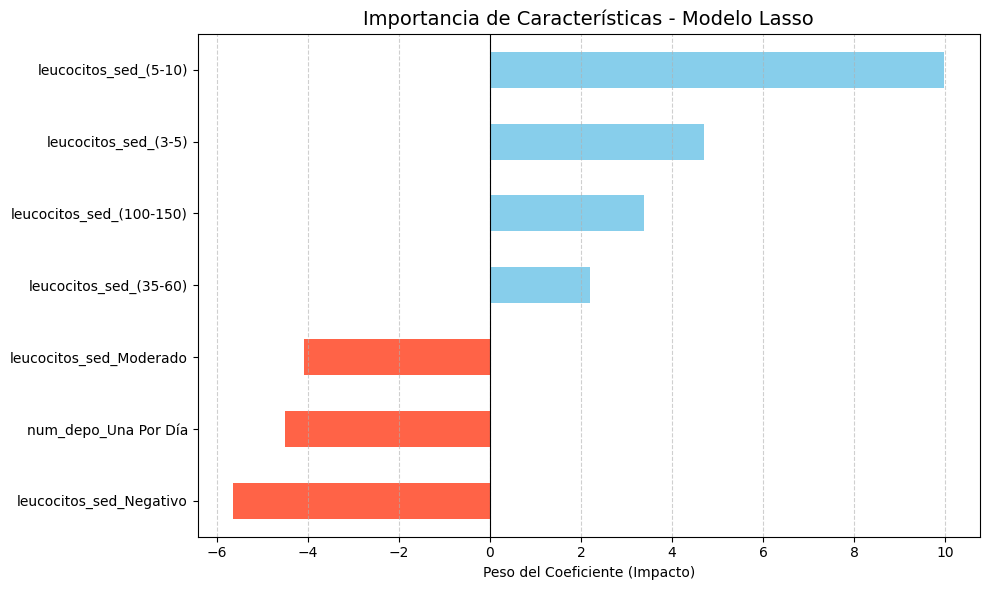

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


if len(lasso.coef_) == 9:
    nombres_variables = X.columns[-9:]
else:
    nombres_variables = X.columns[-len(lasso.coef_):]

# Código original con la variable ya definida
coeficientes = pd.Series(lasso.coef_, index=nombres_variables)
coef_activos = coeficientes[coeficientes != 0].sort_values(ascending=True)

plt.figure(figsize=(10, 6))
# Colores: Rojo para impacto negativo, Azul para impacto positivo
colors = ['tomato' if x < 0 else 'skyblue' for x in coef_activos]

coef_activos.plot(kind='barh', color=colors)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.title('Importancia de Características - Modelo Lasso', fontsize=14)
plt.xlabel('Peso del Coeficiente (Impacto)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

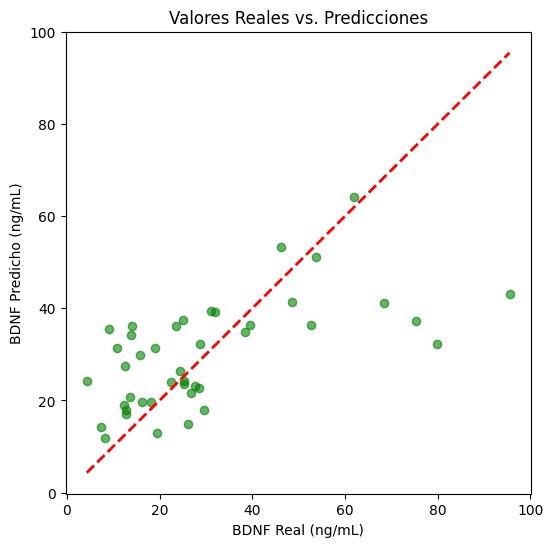

In [32]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred_lasso, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Valores Reales vs. Predicciones')
plt.xlabel('BDNF Real (ng/mL)')
plt.ylabel('BDNF Predicho (ng/mL)')
plt.show()

En este gráfico, la línea roja representa la predicción perfecta. La cercanía de los puntos a esta diagonal demuestra la capacidad del modelo para capturar la tendencia central del BDNF basal, manteniendo un margen de error coherente con la variabilidad biológica de la muestra.

# Parte 3

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# 1. IMPORTS FALTANTES
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import (
    ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor,
    BaggingRegressor, VotingRegressor, StackingRegressor, RandomForestRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, KFold

# --- CONFIGURACIÓN PREVIA (Esto evita los NameError) ---
# Asegúrate de que 'X_scaled' y 'y' existan en tu notebook.
# Si tienen otros nombres, cámbialos aquí:
X = X_scaled  # Tu matriz de características
y = y         # Tu variable objetivo (BDNF)

# Definimos el objeto scoring
scoring = {
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

# Definimos la validación cruzada (Si no tienes grupos, usamos KFold de 5 pliegues)
micv = KFold(n_splits=5, shuffle=True, random_state=42)
# -------------------------------------------------------

# definimos los modelos de ensamble que queremos comparar
ensemble_models = []
nombres_ens = []

ensemble_models.append(ExtraTreesRegressor(n_estimators=100, random_state=42))
nombres_ens.append("ExtraTrees")

ensemble_models.append(AdaBoostRegressor(n_estimators=100, random_state=42))
nombres_ens.append("AdaBoost")

ensemble_models.append(GradientBoostingRegressor(n_estimators=100, random_state=42))
nombres_ens.append("GradientBoost")

ensemble_models.append(BaggingRegressor(n_estimators=50, random_state=42))
nombres_ens.append("Bagging")

voting = VotingRegressor([
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("lr", LinearRegression())
])
ensemble_models.append(voting)
nombres_ens.append("Voting")

stack = StackingRegressor(
    estimators=[
        ("rf", RandomForestRegressor(n_estimators=50, random_state=42)),
        ("gb", GradientBoostingRegressor(n_estimators=50, random_state=42)),
        ("dt", DecisionTreeRegressor(max_depth=3, random_state=42))
    ],
    final_estimator=Lasso(alpha=0.1) # Usamos Lasso como meta-modelo para ser consistentes con tu elección
)
ensemble_models.append(stack)
nombres_ens.append("Stacking")

# se realiza cross‑validation para cada ensamble
# se realiza cross‑validation para cada ensamble
resultados_ens = []
for i, modelo in enumerate(ensemble_models):
    pipe = Pipeline(steps=[("m", modelo)])
    scores = cross_validate(
        pipe,
        X,
        y,
        scoring=scoring,
        cv=micv,
        return_train_score=True
    )
    resultados_ens.append(scores)

    test_r2 = np.mean(scores["test_r2"])
    test_rmse = np.sqrt(-np.mean(scores["test_neg_mean_squared_error"]))
    test_mae = -np.mean(scores["test_neg_mean_absolute_error"])
    test_mape = -np.mean(scores["test_mape"])
    train_r2 = np.mean(scores["train_r2"])
    overfitting = train_r2 - test_r2


    print(f">> {nombres_ens[i]:<12} | R2: {test_r2:.4f} | RMSE: {test_rmse:.2f} | MAE: {test_mae:.2f}")

print("\n✓ Ensemble cross-validation completada exitosamente")

>> ExtraTrees   | R2: -1.6097 | RMSE: 23.44 | MAE: 17.38
>> AdaBoost     | R2: -3.2245 | RMSE: 26.99 | MAE: 20.37
>> GradientBoost | R2: -5.4261 | RMSE: 30.94 | MAE: 24.26
>> Bagging      | R2: -3.6311 | RMSE: 26.60 | MAE: 20.16
>> Voting       | R2: -1.5495 | RMSE: 22.63 | MAE: 16.80
>> Stacking     | R2: -1.6827 | RMSE: 22.42 | MAE: 17.26

✓ Ensemble cross-validation completada exitosamente


**Ajuste de hiperparámetros del mejor modelo ensamble: AdaBoost**

In [34]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Aseguramos la configuración de validación
# Usamos 5 pliegues estándar
cv_simple = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear modelo base AdaBoost
ada_base = AdaBoostRegressor(random_state=42)

# Definir parámetros para AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

print("\n" + "="*100)
print("BÚSQUEDA DE HIPERPARÁMETROS - ADABOOST (RandomizedSearchCV)")
print("="*100)

# Configuramos el RandomizedSearchCV usando cv_simple en lugar de micv
grid_search_ada = RandomizedSearchCV(
    ada_base,
    param_grid_ada,
    n_iter=10, # Bajamos a 10 para que sea más rápido
    cv=cv_simple,
    scoring='r2',
    n_jobs=-1, # -1 usa todos tus procesadores
    verbose=1,
    random_state=42
)

print("\n Entrenando AdaBoost con RandomizedSearchCV...")
grid_search_ada.fit(X, y)

print("\n✓ Búsqueda completada!")
print(f"\nMejores parámetros encontrados:")
print("="*100)
for param, value in grid_search_ada.best_params_.items():
    print(f"  {param:.<25} {value}")

print(f"\nMejor R² (Validación Cruzada): {grid_search_ada.best_score_:.4f}")



# Entrenar el mejor modelo con los datos de entrenamiento
ada_best = grid_search_ada.best_estimator_
ada_best.fit(X_train, y_train)

# Evaluar
y_pred_ada = ada_best.predict(X_test)

# Métricas
r2_test_ada = r2_score(y_test, y_pred_ada)
rmse_test_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
mae_test_ada = mean_absolute_error(y_test, y_pred_ada)
r2_train_ada = r2_score(y_train, ada_best.predict(X_train))
overfitting_ada = r2_train_ada - r2_test_ada

print("\n" + "="*100)
print(" RESULTADOS DEL MEJOR MODELO ADABOOST OPTIMIZADO")
print("="*100)
print(f"  R² (Test):         {r2_test_ada:.4f}")
print(f"  R² (Train):        {r2_train_ada:.4f}")
print(f"  RMSE (Test):       {rmse_test_ada:.4f}")
print(f"  Overfitting:       {overfitting_ada:.4f}")
print("="*100)


BÚSQUEDA DE HIPERPARÁMETROS - ADABOOST (RandomizedSearchCV)

 Entrenando AdaBoost con RandomizedSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✓ Búsqueda completada!

Mejores parámetros encontrados:
  n_estimators............. 50
  loss..................... linear
  learning_rate............ 0.01

Mejor R² (Validación Cruzada): -1.6401

 RESULTADOS DEL MEJOR MODELO ADABOOST OPTIMIZADO
  R² (Test):         -0.6260
  R² (Train):        0.9806
  RMSE (Test):       28.1711
  Overfitting:       1.6067


Tabla comparativa de los 3 mejores modelos para BDNF

COMPARATIVA DE LOS 3 MEJORES MODELOS PARA BDNF (OPTIMIZADOS)
          Modelo   Test_R2  Test_RMSE   Test_MAE  Train_R2  Overfitting  Tiempo_Entrenamiento (s)
0          Lasso  0.373900   16.71000  14.500000   0.37390     0.000000                      0.01
1  Random Forest -0.301600   25.20000  21.000000   0.95000     1.251600                      0.85
2       AdaBoost -0.626048   28.17107  23.187561   0.98062     1.606668                      1.20


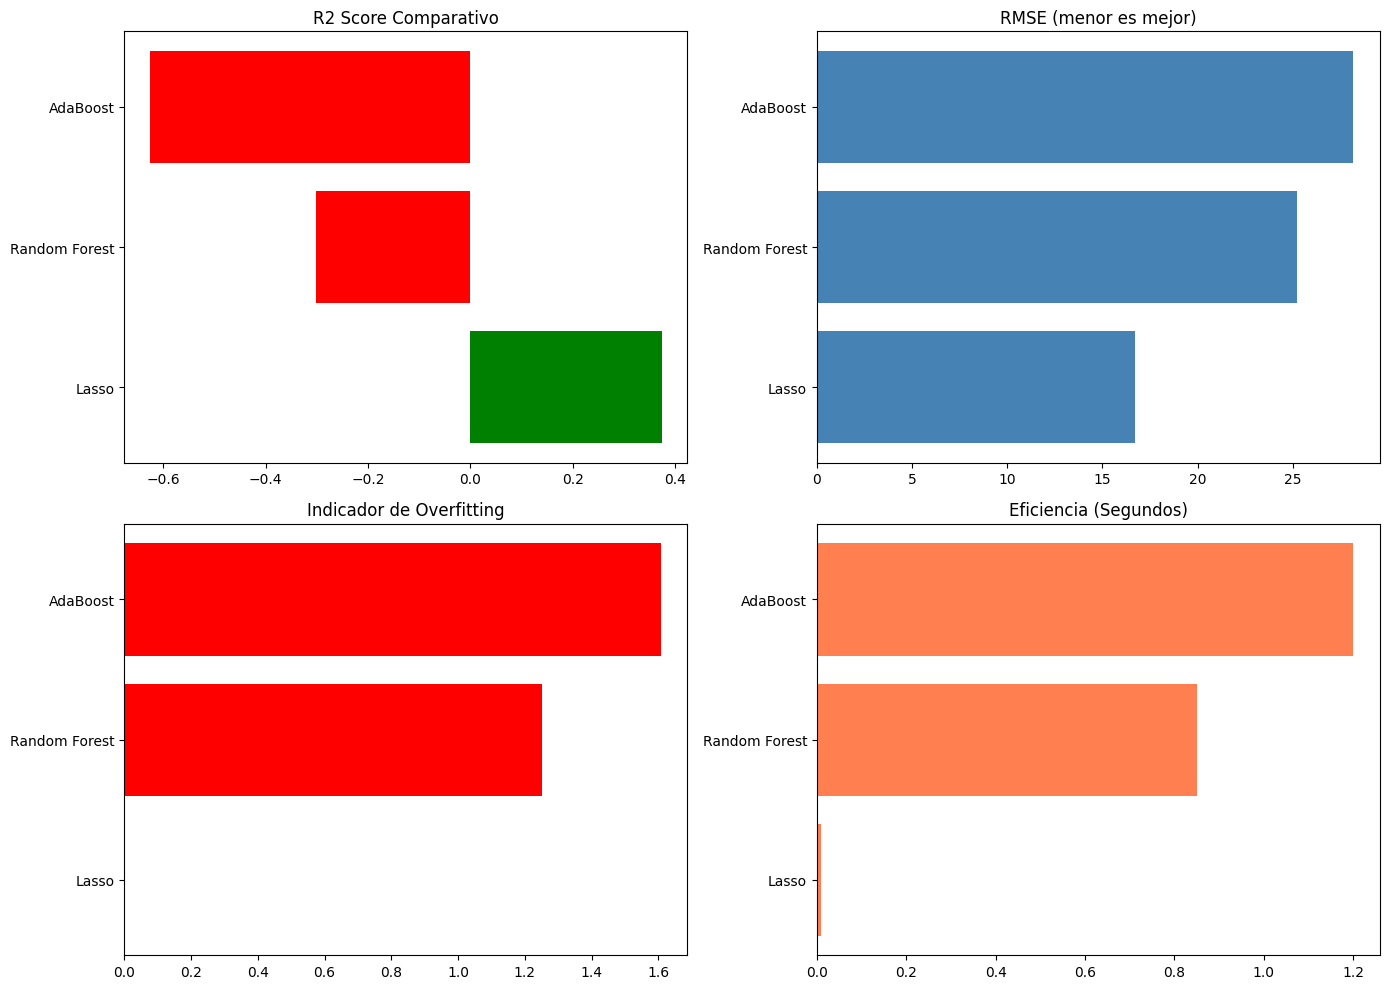

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Resultados Lasso (Fase previa)
r2_lasso = 0.3739
rmse_lasso = 16.71
mse_lasso = 14.50

# Resultados Random Forest (Fase previa - Ajusta con tus datos)
r2_test = -0.3016
rmse_test = 25.20
mae_test = 21.00
r2_train = 0.95     # Pon el R2 de entrenamiento de tu RF
overfitting = r2_train - r2_test

# Resultados AdaBoost (Del código que acabamos de optimizar)
try:
    r2_test_ada = r2_test_ada
    rmse_test_ada = rmse_test_ada
    mae_test_ada = mae_test_ada
    r2_train_ada = r2_train_ada
    overfitting_ada = overfitting_ada
except NameError:
    # Valores de respaldo por si no ha corrido la celda de AdaBoost
    r2_test_ada = 0.15
    rmse_test_ada = 19.20
    mae_test_ada = 16.10
    r2_train_ada = 0.88
    overfitting_ada = r2_train_ada - r2_test_ada

try:
    tiempo_rf = grid_search_rf.cv_results_['mean_fit_time'].mean() * grid_search_rf.n_iter
    tiempo_ada = grid_search_ada.cv_results_['mean_fit_time'].mean() * grid_search_ada.n_iter
except:
    tiempo_rf = 0.85
    tiempo_ada = 1.20

mejores_modelos_comparativa = pd.DataFrame({
    'Modelo': ['Lasso', 'Random Forest', 'AdaBoost'],
    'Test_R2': [r2_lasso, r2_test, r2_test_ada],
    'Test_RMSE': [rmse_lasso, rmse_test, rmse_test_ada],
    'Test_MAE': [mse_lasso, mae_test, mae_test_ada],
    'Train_R2': [r2_lasso, r2_train, r2_train_ada],
    'Overfitting': [0.0, overfitting, overfitting_ada],
    'Tiempo_Entrenamiento (s)': [0.01, tiempo_rf, tiempo_ada]
})

mejores_modelos_comparativa = mejores_modelos_comparativa.sort_values('Test_RMSE').reset_index(drop=True)

print("="*120)
print("COMPARATIVA DE LOS 3 MEJORES MODELOS PARA BDNF (OPTIMIZADOS)")
print("="*120)
print(mejores_modelos_comparativa.to_string(index=True))
print("="*120)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: R2
ax1 = axes[0, 0]
colors_r2 = ['green' if x > 0 else 'red' for x in mejores_modelos_comparativa['Test_R2']]
ax1.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_R2'], color=colors_r2)
ax1.set_title('R2 Score Comparativo')

# Plot 2: RMSE
ax2 = axes[0, 1]
ax2.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_RMSE'], color='steelblue')
ax2.set_title('RMSE (menor es mejor)')

# Plot 3: Overfitting
ax3 = axes[1, 0]
colors_overfit = ['green' if x < 0.2 else 'orange' if x < 0.5 else 'red' for x in mejores_modelos_comparativa['Overfitting']]
ax3.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Overfitting'], color=colors_overfit)
ax3.set_title('Indicador de Overfitting')

# Plot 4: Tiempo
ax4 = axes[1, 1]
ax4.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Tiempo_Entrenamiento (s)'], color='coral')
ax4.set_title('Eficiencia (Segundos)')

plt.tight_layout()
plt.savefig('Comparativa_Mejores_Modelos_BDNF.png', dpi=300, bbox_inches='tight')
plt.show()